In [1]:
import pandas as pd
from data_transform import DataTransform
from dataframeinfo import DataFrameInfo
from plotter import Plotter

In [2]:
# Load Data
df = pd.read_csv("loan_payments.csv")
# Cast Datatypes
transformer = DataTransform()
df = transformer.encode_transform(df)
df = transformer.transform_digit_string(df)
df = transformer.cast_column_dtypes(df)
df_info = DataFrameInfo(df)

id --> int32
member_id --> int32
loan_amount --> int32
funded_amount --> float32
funded_amount_inv --> float32
term --> int32
int_rate --> float32
instalment --> float32
grade --> category
sub_grade --> category
employment_length --> int32
home_ownership --> category
annual_inc --> float32
verification_status --> category
issue_date --> date
loan_status --> category
payment_plan --> category
purpose --> category
dti --> float32
delinq_2yrs --> int32
earliest_credit_line --> date
inq_last_6mths --> int32
mths_since_last_delinq --> int32
mths_since_last_record --> int32
open_accounts --> int32
total_accounts --> int32
out_prncp --> float32
out_prncp_inv --> float32
total_payment --> float32
total_payment_inv --> float32
total_rec_prncp --> float32
total_rec_int --> float32
total_rec_late_fee --> float32
recoveries --> float32
collection_recovery_fee --> float32
last_payment_date --> date
last_payment_amount --> float32
next_payment_date --> date
last_credit_pull_date --> date
collections

In [17]:
df_info.describe_column_dtypes()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54231 entries, 0 to 54230
Data columns (total 44 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   Unnamed: 0                   int64         
 1   id                           int32         
 2   member_id                    int32         
 3   loan_amount                  int32         
 4   funded_amount                float32       
 5   funded_amount_inv            float32       
 6   term                         category      
 7   int_rate                     float32       
 8   instalment                   float32       
 9   grade                        category      
 10  sub_grade                    category      
 11  employment_length            float32       
 12  home_ownership               category      
 13  annual_inc                   float32       
 14  verification_status          category      
 15  issue_date                   datetime64[ns]
 16  loan

In [9]:
columns_with_nulls = df_info.get_only_columns_with_nulls()
columns_with_nulls

,number of nulls,percentage of nulls,percentage of non-nulls
funded_amount,3007,5.54,94.46
int_rate,5169,9.53,90.47
mths_since_last_delinq,31002,57.17,42.83
mths_since_last_record,48050,88.60,11.40
collections_12_mths_ex_med,51,0.09,99.91
mths_since_last_major_derog,46732,86.17,13.83


In [10]:
columns_with_nulls.T[1:]

,funded_amount,int_rate,mths_since_last_delinq,mths_since_last_record,collections_12_mths_ex_med,mths_since_last_major_derog
percentage of nulls,5.54,9.53,57.17,88.6,0.09,86.17
percentage of non-nulls,94.46,90.47,42.83,11.4,99.91,13.83


In [11]:
column_names = columns_with_nulls.T[1:].columns
print(column_names)

Index(['funded_amount', 'int_rate', 'mths_since_last_delinq',
       'mths_since_last_record', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog'],
      dtype='object')


In [12]:
columns_with_nulls.T[1:]

,funded_amount,int_rate,mths_since_last_delinq,mths_since_last_record,collections_12_mths_ex_med,mths_since_last_major_derog
percentage of nulls,5.54,9.53,57.17,88.6,0.09,86.17
percentage of non-nulls,94.46,90.47,42.83,11.4,99.91,13.83


<Figure size 640x480 with 0 Axes>

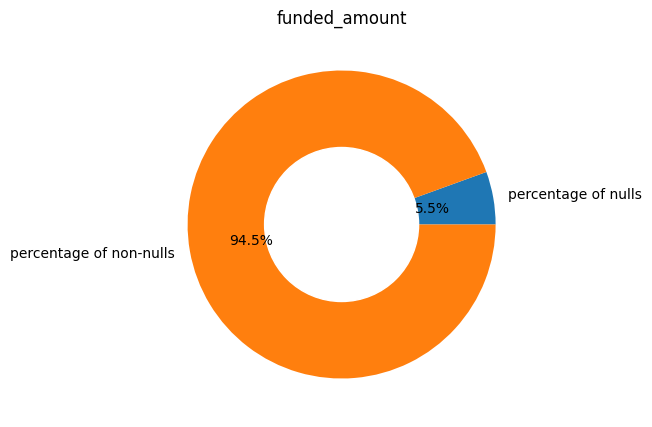

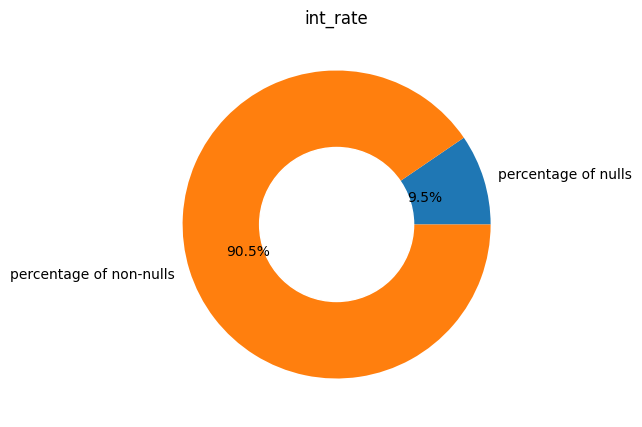

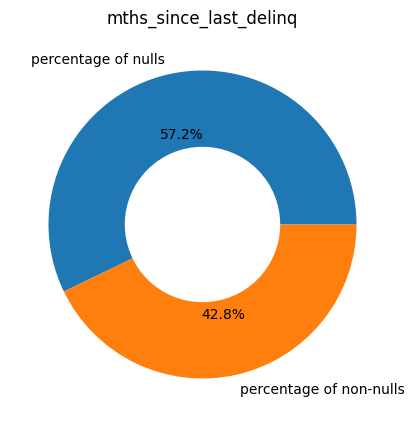

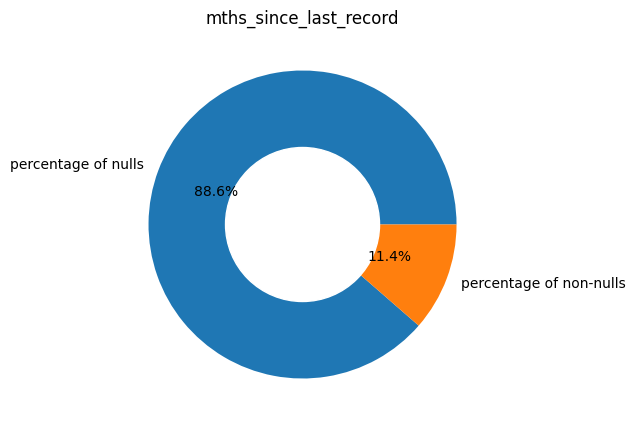

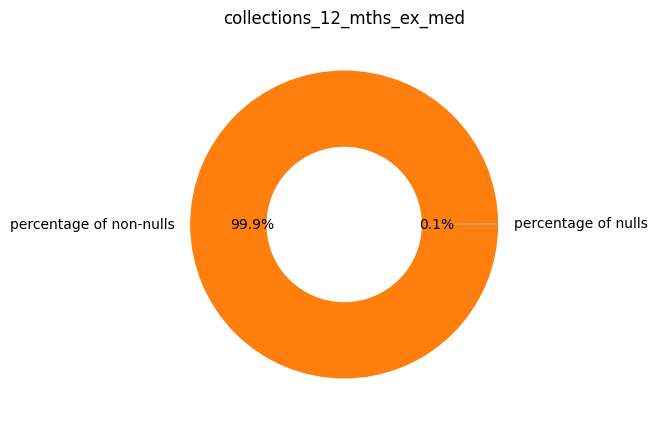

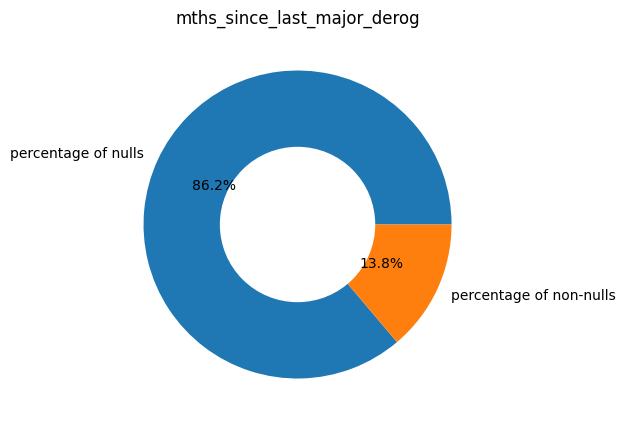

In [13]:
import matplotlib.pyplot as plt

for index,column in enumerate(column_names):
    plt.figure(index)
    columns_with_nulls.T[1:].plot(kind='pie',y=column,
                                  figsize=(5, 5),autopct='%1.1f%%',
                                  legend=False,subplots=True,
                                  ylabel='')
    my_circle=plt.Circle( (0,0), 0.5, color='white')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.title(column)
plt.show()

<Figure size 640x480 with 0 Axes>

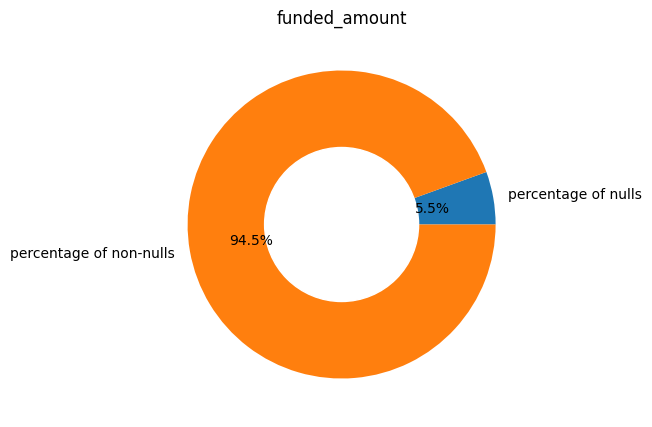

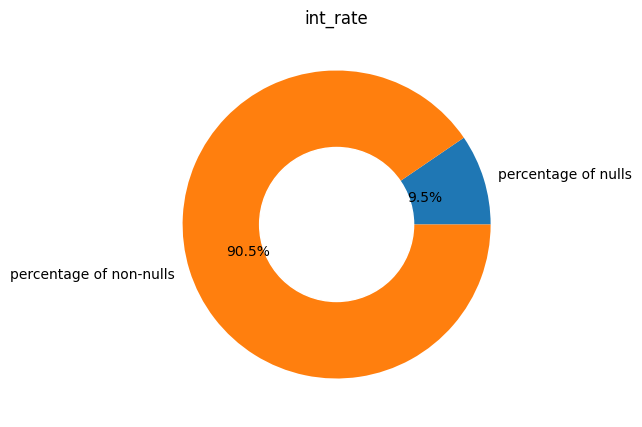

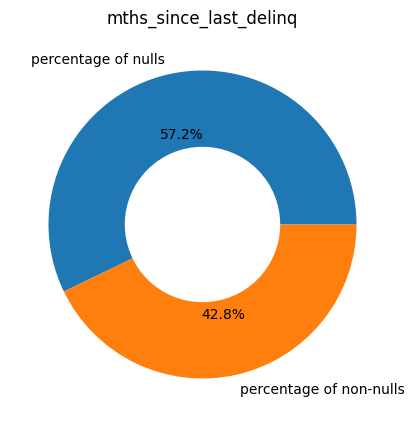

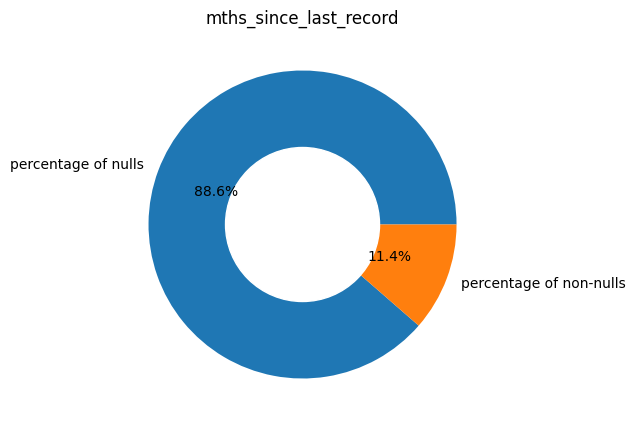

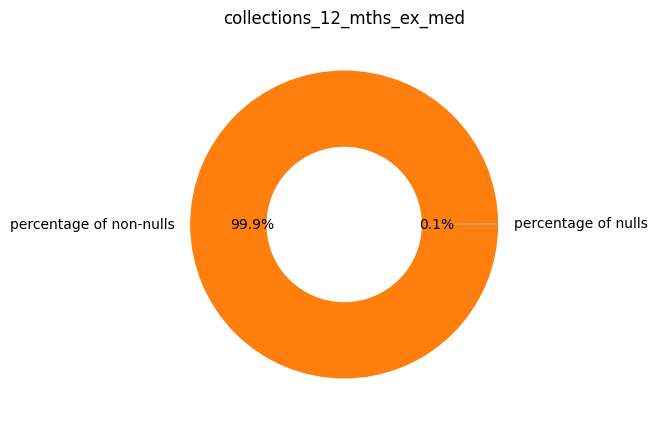

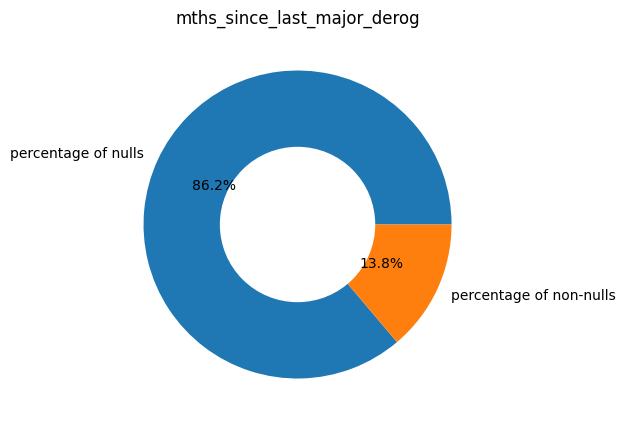

In [4]:
plotter = Plotter()
plotter.plot_null_percentages(columns_with_nulls)